# Extracting Noise from the Pre-industrial (piControl) simulations.
## Loading CMIP6 data, detrend on a monthly basis, computed standard deviations, and return the detrended dataset and standardized detrended dataset.

Import packages.

In [2]:
%matplotlib inline
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Load the previously saved list of paths and files from ``00_find_data.ipynb``.

In [3]:
data_list = pd.read_csv('/glade/u/home/molina/CMIP6_pathnames.csv')

Check path for a piControl file.

In [4]:
data_list

,Unnamed: 0,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,35731,CMIP,BCC,BCC-CSM2-MR,historical,r2i1p1f1,Amon,tas,gn,NaN,v20181115,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-CSM...
1,36172,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,tas,gn,NaN,v20181126,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-CSM...
2,36609,CMIP,BCC,BCC-CSM2-MR,historical,r3i1p1f1,Amon,tas,gn,NaN,v20181119,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-CSM...
3,37431,CMIP,BCC,BCC-CSM2-MR,piControl,r1i1p1f1,Amon,tas,gn,NaN,v20181016,185001-244912,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-CSM...
4,174777,CMIP,CAS,FGOALS-g3,historical,r2i1p1f1,Amon,tas,gn,NaN,v20190828,196001-196912,/glade/collections/cmip/CMIP6/CMIP/CAS/FGOALS-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,652996,ScenarioMIP,CAMS,CAMS-CSM1-0,ssp585,r1i1p1f1,Amon,tas,gn,NaN,v20190708,201501-209912,/glade/collections/cmip/CMIP6/ScenarioMIP/CAMS...
281,697364,ScenarioMIP,MRI,MRI-ESM2-0,ssp585,r1i1p1f1,Amon,tas,gn,NaN,v20190222,201501-210012,/glade/collections/cmip/CMIP6/ScenarioMIP/MRI/...
282,697661,ScenarioMIP,MIROC,MIROC-ES2L,ssp585,r1i1p1f2,Amon,tas,gn,NaN,v20190823,201501-210012,/glade/collections/cmip/CMIP6/ScenarioMIP/MIRO...
283,697914,ScenarioMIP,MIROC,MIROC6,ssp585,r2i1p1f1,Amon,tas,gn,NaN,v20190627,201501-210012,/glade/collections/cmip/CMIP6/ScenarioMIP/MIRO...


Choose the first instance of piControl.

In [5]:
data_list.path[3]

'/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-CSM2-MR/piControl/r1i1p1f1/Amon/tas/gn/v20181016/tas/tas_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc'

Load the piControl dataset into xarray dataset.

In [6]:
first_data = xr.open_dataset(data_list.path[3])

Check the file's metadata.

In [7]:
first_data

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 160, lon: 320, time: 7200)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2449-12-16 12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The coupled model starts from model state after 3...
    contact:                Dr. Tongwen Wu (twwu@cma.gov.cn)
    creation_date:          2018-10-16T02:24:49Z
    data_specs_version:     01.00.27
    description:        

Take a look at the time series of the data quickly by taking mean over all grid cells.

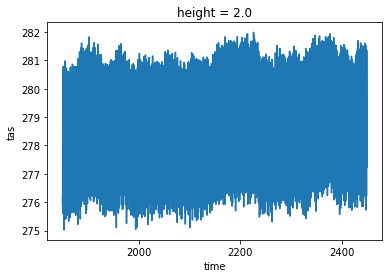

In [8]:
first_data['tas'].mean(dim=['lat','lon']).plot()

Compute the monthly means for each grid cell.

In [9]:
monthly_climo = first_data['tas'].groupby('time.month').mean()

Below we computed the annual means for each grid cell, but we are no longer doing this.

In [10]:
#annual_climo = first_data['tas'].groupby('time.year').mean()

Check computation of the monthly climatology. Notice that data has been grouped into 12 months.

In [11]:
monthly_climo

<xarray.DataArray 'tas' (month: 12, lat: 160, lon: 320)>
array([[[246.13487, 246.11531, 246.09695, ..., 246.19786, 246.1763 ,
         246.15651],
        [246.87674, 246.82709, 246.77765, ..., 247.03151, 246.98076,
         246.92995],
        [247.41039, 247.32933, 247.24974, ..., 247.66005, 247.57578,
         247.49297],
        ...,
        [241.03851, 241.06342, 241.09966, ..., 240.94545, 240.96622,
         241.00723],
        [240.89638, 240.91951, 240.95903, ..., 240.8414 , 240.86324,
         240.88138],
        [240.71396, 240.73927, 240.76532, ..., 240.7119 , 240.71156,
         240.71127]],

       [[236.32552, 236.28914, 236.2524 , ..., 236.39726, 236.37526,
         236.34747],
        [237.09334, 237.02605, 236.95862, ..., 237.2776 , 237.21341,
         237.15025],
        [237.6881 , 237.58073, 237.47206, ..., 238.01984, 237.90938,
         237.79573],
        ...,
        [240.22137, 240.24948, 240.29062, ..., 240.12183, 240.14343,
         240.18643],
        [240.13

Compute the anomalies using monthly means, this effectively removes the monthly signal.

In [14]:
demonthlied_data = first_data['tas'].groupby('time.month') - monthly_climo

#again, no longer doing this.
#deannualed_data = first_data['tas'].groupby('time.year') - annual_climo

Check data

In [15]:
demonthlied_data

<xarray.DataArray 'tas' (time: 7200, lat: 160, lon: 320)>
array([[[ 0.26849365,  0.26087952,  0.26893616, ...,  0.26846313,
          0.272995  ,  0.2728424 ],
        [ 0.04527283,  0.03652954,  0.02246094, ...,  0.07028198,
          0.06295776,  0.05244446],
        [-0.57128906, -0.57614136, -0.59783936, ..., -0.4933777 ,
         -0.5196228 , -0.5497589 ],
        ...,
        [-2.469986  , -2.482071  , -2.4953766 , ..., -2.4052734 ,
         -2.421753  , -2.452118  ],
        [-2.2801208 , -2.293579  , -2.3159485 , ..., -2.2376251 ,
         -2.2551117 , -2.2688751 ],
        [-2.126831  , -2.1474152 , -2.1683502 , ..., -2.1243744 ,
         -2.1243591 , -2.1243896 ]],

       [[-2.1184692 , -2.1094055 , -2.1152954 , ..., -2.063507  ,
         -2.0681915 , -2.100525  ],
        [-2.7353363 , -2.7383423 , -2.7778625 , ..., -2.6615143 ,
         -2.6842804 , -2.704483  ],
        [-3.2906494 , -3.3667908 , -3.3999481 , ..., -3.209671  ,
         -3.269989  , -3.265686  ],
        .

Plot the time series of two different grid cells to examine the detrended data.

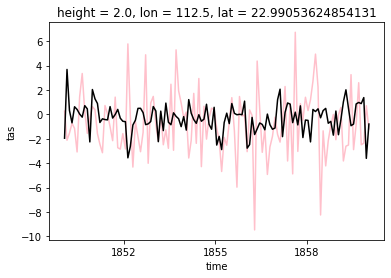

In [16]:
demonthlied_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=0,lon=0).plot(c='pink')
demonthlied_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=100,lon=100).plot(c='k')

#no longer doing this.
#deannualed_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=0,lon=0).plot(c='r')
#deannualed_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=100,lon=100).plot(c='b')

Compute the temperature standard deviation at each grid cell over the full time series.

In [17]:
demonthlied_std = demonthlied_data.std(dim='time')
demonthlied_std

<xarray.DataArray 'tas' (lat: 160, lon: 320)>
array([[2.464753 , 2.4672015, 2.4701798, ..., 2.4630768, 2.4637597,
        2.4646914],
       [2.5212803, 2.5213852, 2.5219624, ..., 2.523232 , 2.5231733,
        2.5236135],
       [2.5825226, 2.5801597, 2.5785353, ..., 2.5870078, 2.5852802,
        2.584282 ],
       ...,
       [2.1827643, 2.1842859, 2.189165 , ..., 2.1692958, 2.1741982,
        2.1819062],
       [2.1398025, 2.1400452, 2.1408596, ..., 2.1388361, 2.139217 ,
        2.139521 ],
       [2.1305509, 2.131213 , 2.1320825, ..., 2.1303082, 2.1303704,
        2.1304324]], dtype=float32)
Coordinates:
    height   float64 ...
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14

Plot the standard deviation data, set the data range from 0 to 3.

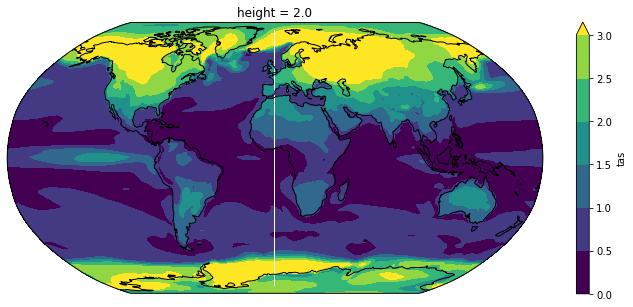

In [19]:
ax = plt.axes(projection=ccrs.Robinson())

demonthlied_std.plot.contourf(ax=ax, vmin=0, vmax=3, transform=ccrs.PlateCarree())
ax.coastlines()
plt.gcf().set_size_inches((12,5))

Compute the standardized monthly anomalies and plot for one time value.

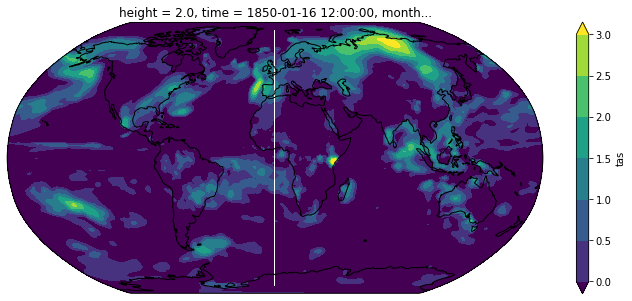

In [20]:
thedata = demonthlied_data/demonthlied_std

ax = plt.axes(projection=ccrs.Robinson())

thedata.isel(time=0).plot.contourf(ax=ax, vmin=0, vmax=3, transform=ccrs.PlateCarree())
ax.coastlines()
plt.gcf().set_size_inches((12,5))

View the standardized monthly detrended data.

In [21]:
thedata

<xarray.DataArray 'tas' (time: 7200, lat: 160, lon: 320)>
array([[[ 0.10893329,  0.10573904,  0.10887311, ...,  0.10899503,
          0.11080423,  0.11070044],
        [ 0.01795628,  0.01448789,  0.00890614, ...,  0.02785395,
          0.02495182,  0.02078149],
        [-0.22121358, -0.22329679, -0.23185231, ..., -0.19071364,
         -0.20099284, -0.2127318 ],
        ...,
        [-1.1315862 , -1.1363306 , -1.1398759 , ..., -1.1087807 ,
         -1.1138602 , -1.123842  ],
        [-1.0655754 , -1.0717434 , -1.0817844 , ..., -1.0461882 ,
         -1.0541763 , -1.0604595 ],
        [-0.99825406, -1.0076023 , -1.0170105 , ..., -0.9972146 ,
         -0.9971783 , -0.9971636 ]],

       [[-0.8595057 , -0.85497904, -0.85633254, ..., -0.8377762 ,
         -0.83944535, -0.85224664],
        [-1.0848998 , -1.0860468 , -1.1014687 , ..., -1.0548036 ,
         -1.063851  , -1.0716709 ],
        [-1.2741996 , -1.3048769 , -1.3185579 , ..., -1.2406886 ,
         -1.264849  , -1.2636725 ],
        .

Plot the demonthlied data and the standardized data at two grid cells in side-by-side plots.

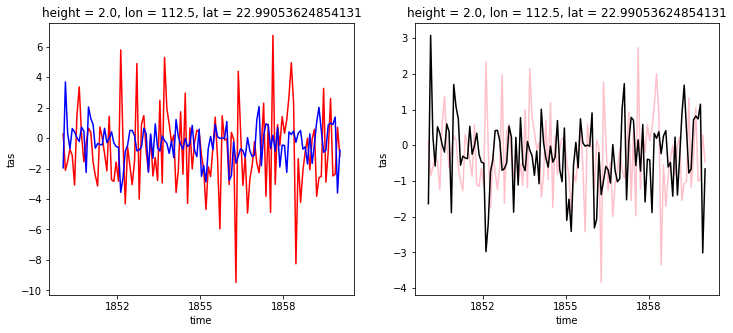

In [23]:
plt.subplot(121)
demonthlied_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=0,lon=0).plot(c='r')
demonthlied_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=100,lon=100).plot(c='b')

plt.subplot(122)
thedata.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=0,lon=0).plot(c='pink')
thedata.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=100,lon=100).plot(c='k')

plt.gcf().set_size_inches((12,5))

Set the data attributes for methodology of computing the files prior to saving them.

In [24]:
thedata.attrs['data'] = 'piControl_demonthlied_standardized'
thedata.attrs['demonthlied'] = 'subtracted monthly mean for each grid cell'
thedata.attrs['standardized'] = 'subtracted standard deviation over time at each grid cell of demonthlied data'

demonthlied_data.attrs['data'] = 'piControl_demonthlied'
thedata.attrs['demonthlied'] = 'subtracted monthly mean for each grid cell'

Save the datasets as netCDF files.

In [86]:
thedata.to_netcdf('~/piControl_demonthlied_standardized.nc')
demonthlied_data.to_netcdf('~/piControl_demonthlied.nc')